This script is just to record. by Leon

In [ ]:
import pyvisa

In [2]:
rm = pyvisa.ResourceManager()

In [ ]:
# list available instruments

In [60]:
 print(rm.list_resources())

('ASRL4::INSTR', 'GPIB0::13::INSTR', 'GPIB0::19::INSTR', 'GPIB0::20::INSTR', 'GPIB0::25::INSTR', 'GPIB0::6::INSTR', 'TCPIP0::172.16.1.66::inst0::INSTR', 'GPIB0::25::0::INSTR', 'GPIB0::6::0::INSTR')


In [61]:
print(rm.list_resources_info())

{'ASRL4::INSTR': ResourceInfo(interface_type=<InterfaceType.asrl: 4>, interface_board_number=4, resource_class='INSTR', resource_name='ASRL4::INSTR', alias=None), 'GPIB0::13::INSTR': ResourceInfo(interface_type=<InterfaceType.gpib: 1>, interface_board_number=0, resource_class='INSTR', resource_name='GPIB0::13::INSTR', alias=None), 'GPIB0::19::INSTR': ResourceInfo(interface_type=<InterfaceType.gpib: 1>, interface_board_number=0, resource_class='INSTR', resource_name='GPIB0::19::INSTR', alias=None), 'GPIB0::20::INSTR': ResourceInfo(interface_type=<InterfaceType.gpib: 1>, interface_board_number=0, resource_class='INSTR', resource_name='GPIB0::20::INSTR', alias=None), 'GPIB0::25::INSTR': ResourceInfo(interface_type=<InterfaceType.gpib: 1>, interface_board_number=0, resource_class='INSTR', resource_name='GPIB0::25::INSTR', alias=None), 'GPIB0::6::INSTR': ResourceInfo(interface_type=<InterfaceType.gpib: 1>, interface_board_number=0, resource_class='INSTR', resource_name='GPIB0::6::INSTR', al

In [62]:
print(rm.list_opened_resources())

[<'GPIBInstrument'('GPIB0::6::0::INSTR')>, <'GPIBInstrument'('GPIB0::25::0::INSTR')>]


In [8]:
sa = rm.open_resource('GPIB0::25::INSTR')

In [26]:
sa.query('*IDN?')

'Agilent Technologies,N9020A,MY49100209,A.13.07'

In [10]:
print(sa)

GPIBInstrument at GPIB0::25::0::INSTR


In [13]:
sa.read_termination = '\n'
sa.write_termination = '\n'
sa.query('*IDN?')

'Agilent Technologies,N9020A,MY49100209,A.13.07'

In [15]:
ps = rm.open_resource('GPIB0::6::INSTR')

In [16]:
ps.query('*IDN?')

'Agilent Technologies,N5767A,US12F7253L,A.04.02,REV:E\n'

In [17]:
ps.read_termination = '\n'
ps.write_termination = '\n'
ps.query('*IDN?')

'Agilent Technologies,N5767A,US12F7253L,A.04.02,REV:E'

In [ ]:
import time

In [27]:
sa.read_termination = '\n'
sa.write_termination = '\n'
sa.write('*IDN?')
time.sleep(0.1)
while True:
    print(sa.read_bytes(1))
    time.sleep(0.1)

b'A'
b'g'
b'i'
b'l'
b'e'
b'n'
b't'
b' '
b'T'
b'e'
b'c'
b'h'
b'n'
b'o'
b'l'
b'o'
b'g'
b'i'
b'e'
b's'
b','
b'N'
b'9'
b'0'
b'2'
b'0'
b'A'
b','
b'M'
b'Y'
b'4'
b'9'
b'1'
b'0'
b'0'
b'2'
b'0'
b'9'
b','
b'A'
b'.'
b'1'
b'3'
b'.'
b'0'
b'7'
b'\n'


OSError: exception: access violation reading 0x000002382D556207

print RBW

In [30]:
print(sa.query('BAND?'))

3.000000000E+06


GetAcpAchRes

In [31]:
#print(sa.query('CALC:LIM:ACP:ACH:RES?'))

OSError: exception: access violation reading 0x000002382A491A0F

In [32]:
print(sa.write('CALC:LIM:ACP:ACH:RES?'))

22


IEEE 488.2 Common Commands

ALL. The instrument stops any measurement currently underway,
performs the alignment, then restarts the measurement from the beginning (similar
to pressing the Restart key).

In [34]:
print(sa.query(':CAL'))

OSError: exception: access violation reading 0x000002382A4C8DBF

In [38]:
sa.write(':CAL')
print(sa.query('*STB?'))
time.sleep(10)
print(sa.query('*STB?'))
time.sleep(10)
print(sa.query('*STB?'))


OSError: exception: access violation reading 0x000002382A41175F

In [ ]:
sa.write(':CAL')

In [35]:
sa.query('*STB?')

'4'

In [45]:
print(sa.query('*STB?'))

0


In [42]:
sa.write('*STB?')
print(sa.read())

4


RF


    Clear Status

In [43]:
print(sa.query('*CLS'))

OSError: exception: access violation reading 0x000002382A41877F

In [184]:
sa.write('*CLS')

5

In [46]:
print(sa.query('*STB?'))

0


    Self Test Query
    This query performs the internal self-test routines and returns a number indicating
the success of the testing. A zero is returned if the test is successful, 1 if it fails

In [47]:
print(sa.query('*TST?'))

0


    Input/Output Functions 

In [49]:
sa.write(':FEED?')
print(sa.read())

RF


In [48]:
sa.write('INP:MIX?')
print(sa.read())

EXT


In [50]:
sa.write('CORR:IMP?')
print(sa.read())

5.000000000E+01


     RF Coupling 

In [51]:
sa.write('INP:COUP?')
print(sa.read())

AC


    Specifies the RF input port used.

In [54]:
sa.write(':SENSe:FEED:RF:PORT:INPut?')
print(sa.read())

RFIN


    Input/Output, External Gain

In [55]:
sa.write(':SENSe:CORRection:SA:RF:GAIN?')
print(sa.read())

0.000000000E+00


    Freq Ref In


In [56]:
sa.write(':SENSe:ROSCillator:SOURce:TYPE?')
print(sa.read())

SENS


    Input/Output, Output Config, Trig out

In [57]:
sa.write(':TRIGger:SEQuence:OUTPut?')
print(sa.read())

sa.write(':TRIGger1:SEQuence:OUTPut?')
print(sa.read())

sa.write(':TRIGger2:SEQuence:OUTPut?')
print(sa.read())

HSWP
HSWP
GATE


    # MODE

    Front-panel key

In [58]:
sa.write(':INST?')
print(sa.read())

SA


    A list of the valid mode choices 

In [64]:
sa.write(':INST:CAT?')
print(sa.read())

"PNOISE 14, CWIMAXOFDM 81, LTE 102, CDMA1XEV 15, LTEATDD 108, SA 1, LTETDD 105, RLC 266, EDGEGSM 13, IDEN 103, NFIG 219, BT 228, CWLAN 19, ADEMOD 234, TDSCDMA 211, VSA89601 101, BASIC 8, WLAN 217, VSA 100, WCDMA 9, CDMA2K 10"


VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

     Trigger Source Presets

In [65]:
sa.write(':TRIGger:ACP:SEQuence:SOURce?')
print(sa.read())

EXT1


In [ ]:
     Trigger Source -RF Trigger Source

In [66]:
sa.write(':TRIGger:ACP:SEQuence:RF:SOURce?')
print(sa.read())

EXT1


In [83]:
sa.write(':TRIG:ACP:RF:SOUR IMM')
print(sa.read())

OSError: exception: access violation reading 0x000002382A5B54EF

    Trigger Source -I/Q Trigger Source

In [67]:
sa.write(':TRIGger:ACP:SEQuence:IQ:SOURce?')
print(sa.read())

OSError: exception: access violation reading 0x000002382A57B49F

    Swept SA Measurement

    AMPTD Y Scale

In [69]:
sa.write(':DISP:WIND:TRAC:Y:RLEV?')
print(sa.read())

0.00E+00


In [96]:
sa.write(':DISP:WIND:TRAC:Y:RLEV -40')
print(sa.read())

OSError: exception: access violation reading 0x000002382A5DF52F

    AMPTD Y Scale, Attenuation

In [97]:
sa.write('POW:ATT?')
print(sa.read())

6


In [98]:
sa.write('POW:ATT 15')
#print(sa.read())

11

    AMPTD Y Scale

In [99]:
sa.write('DISP:WIND:TRAC:Y:PDIV?')
print(sa.read())

1.00E+01


In [100]:
sa.write('DISP:WIND:TRAC:Y:PDIV 5 DB')

27

    Bandwidth

In [114]:
# Res BW

sa.write('BAND 1 MHz')
sa.write('BAND?')
print(sa.read())

1.000000000E+06


In [102]:
# Video BW
sa.write('BAND:VID?')
print(sa.read())

3.000000000E+06


In [130]:
sa.write('*CLS')

5

    SPAN:3dB RBW
    Selects the ratio between span and resolution bandwidth

In [104]:
# 
sa.write('FREQ:SPAN:BAND:RAT?')
print(sa.read())

1.060000000E+02


    Cont (Continuous Measurement/Sweep)

In [107]:


sa.write('INIT:CONT 1')
#print(sa.read())

#  
sa.write('INIT:CONT?')
print(sa.read())

1


    Auto Tune

In [108]:
sa.write('FREQ:TUNE:IMM')

14

    Zoom Center

In [109]:
#sa.write('FREQ:TZO:CENT 20MHz')

20

    Freq Tune

In [117]:
sa.write('FREQ:CENT 3700 MHz')
sa.write('FREQ:START 3600 MHz')
sa.write('FREQ:STOP 3800 MHz')
sa.write('FREQ:OFFS 10 MHz')
sa.write('FREQ:OFFS?')
print(sa.read())

1.0000000E+07


    Marker

In [121]:
sa.write(':CALCulate:MARKer:X?')
print(sa.read())

9.91E+37


In [124]:
sa.write(':CALCulate:MARKer:STATe ON')
sa.write(':CALCulate:MARKer:X 3700 MHz')


3.700000000000E+09


In [125]:
sa.write(':CALCulate:MARKer:X?')
print(sa.read())
sa.write(':CALCulate:MARKer:Y?')
print(sa.read())

3.700000000000E+09
-7.6126E+01


In [126]:
sa.write(':CALCulate:MARKer2:STATe ON')
sa.write(':CALCulate:MARKer2:X 3750 MHz')

30

In [127]:
sa.write(':CALCulate:MARKer2:X?')
print(sa.read())
sa.write(':CALCulate:MARKer2:Y?')
print(sa.read())

3.750000000000E+09
-7.4354E+01


In [131]:
sa.write(':CALC:MARK:MODE DELT')


21

    Meas Setup

In [133]:
#average
sa.write(':AVER:COUN 1000')


16

In [137]:
sa.write(':AVER:TYPE:AUTO ON')

19

In [140]:
sa.write(':CALC:MARK1:MAX')

16

    Save

In [142]:
sa.write(':MMEM:STOR:TRAC:DATA TRACE1, "myTrace1.csv" ')

45

    Sweep

In [144]:
sa.write('SWE:TIME 50 ms')

15

    Trace

In [149]:
#sa.write(':TRACe1:TYPE  MAXHold')
#sa.write(':TRACe1:TYPE  MINHold')
#sa.write(':TRACe1:TYPE  AVERage')
sa.write(':TRACe1:TYPE  WRITe')

20

In [157]:
import numpy

In [158]:
data =sa.query_ascii_values('TRAC? TRACE1', container = numpy.array)
print(data)

[-75.04184723 -99.6913681  -75.16482544 ... -74.50485992 -96.35525513
 -73.6714325 ]


In [159]:
data.view()

array([-75.04184723, -99.6913681 , -75.16482544, ..., -74.50485992,
       -96.35525513, -73.6714325 ])

In [160]:
from matplotlib import pyplot as plt

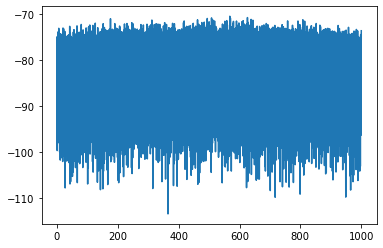

In [162]:
plt.plot(data)
plt.show()

    Channel Power Measurement

In [163]:
sa.query_ascii_values('DISP:CHP:VIEW:WIND:TRAC:Y:RLEV?')

[10.0]

In [165]:
sa.write(':CONFigure:CHPower')

19

In [166]:
sa.write(':INITiate:CHPower')

18

In [167]:
sa.query_ascii_values(':FETCh:CHPower?')

[-77.86289215, -140.8731842]

In [169]:
sa.query_ascii_values(':MEASure:CHPower?')

[-77.80198669, -140.8122864]

In [170]:
sa.query_ascii_values(':READ:CHPower?')

[-77.77559662, -140.7858887]

In [171]:
sa.query_ascii_values(':FETCh:CHPower:CHPower?')

[-77.70155334]

In [172]:
sa.query_ascii_values(':FETCh:CHPower:DENSity?')

[-140.8887024]

    ACP

In [175]:
sa.write(':CONFigure:ACPower')

19

In [176]:
sa.write(':CONFigure:ACPower:NDEFault')

28

In [177]:
sa.write(':INITiate:ACPower')

18

In [179]:
sa.write(':FETCh:ACPower?')
print(sa.read())

OSError: exception: access violation reading 0x000002382A976E0F

In [180]:
sa.write(':READ:ACPower?')
print(sa.read())

OSError: exception: access violation reading 0x000002382B0AF01F

In [181]:
sa.write(':MEASure:ACPower?')
print(sa.read())

OSError: exception: access violation reading 0x000002382A9D601F

    Carriers Setup

In [214]:
sa.write('ACP:CARR:COUN 1')

VisaIOError: VI_ERROR_NSUP_OPER (-1073807257): The given session or object reference does not support this operation.

Sets the reference carrier. Relative power measurements are made from the
    reference carrier.

In [187]:
sa.write('ACP:CARR:RCAR?')

15

Sets the reference carrier frequency.

In [189]:
sa.write('ACP:CARR:RCFR 3700 MHz')

23

In [190]:
#sa.write('ACP:CARR:PREF:TYPE RCARrier')

28

In [209]:

SA_CMD_SET_ACP = {
    #"S1":{                   "Cmd": "CALC:MARK:FUNC:POW:SEL",        "CmdPar": "ACP",                   "RdWrFlag": "0"},
    #"S2":{                   "Cmd": "CALC:MARK:FUNC:POW:PRES",       "CmdPar": "NONE",                  "RdWrFlag": "0"},
    "S3":{                   "Cmd": "POW:ACH:TXCH:COUN",             "CmdPar": "1",                     "RdWrFlag": "0"},
    "S4":{                   "Cmd": "POW:ACH:NAME:CHAN1",            "CmdPar": "'TxChannel'",           "RdWrFlag": "0"},
    "S5":{                   "Cmd": "POW:ACH:NAME:CHAN2",            "CmdPar": "'TxChanne2'",           "RdWrFlag": "0"},
    "S6":{                   "Cmd": "POW:ACH:NAME:CHAN3",            "CmdPar": "'TxChanne3'",           "RdWrFlag": "0"},
    "S7":{                   "Cmd": "POW:ACH:ACP",                   "CmdPar": "2",                     "RdWrFlag": "0"},
    "S8":{                   "Cmd": "POW:ACH:NAME:ACH",              "CmdPar": "'ACH'",                 "RdWrFlag": "0"},
    "S9":{                   "Cmd": "POW:ACH:NAME:ALT1",             "CmdPar": "'ALT1'",                "RdWrFlag": "0"},
    "S10":{                  "Cmd": "POW:ACH:NAME:ALT2",             "CmdPar": "'ALT2'",                "RdWrFlag": "0"},
    "S11":{                  "Cmd": "POW:ACH:BWID:CHAN1",            "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S12":{                  "Cmd": "POW:ACH:BWID:CHAN2",            "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S13":{                  "Cmd": "POW:ACH:BWID:CHAN3",            "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S14":{                  "Cmd": "POW:ACH:BWID:ACH",              "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S15":{                  "Cmd": "POW:ACH:BWID:ALT1",             "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S16":{                  "Cmd": "POW:ACH:BWID:ALT2",             "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S17":{                  "Cmd": "POW:ACH:SPAC:CHAN1",            "CmdPar": "10MHz",                 "RdWrFlag": "0"},
    "S18":{                  "Cmd": "POW:ACH:SPAC:CHAN2",            "CmdPar": "10MHz",                 "RdWrFlag": "0"},
    "S19":{                  "Cmd": "POW:ACH:SPAC",                  "CmdPar": "5MHz",                  "RdWrFlag": "0"},
    "S20":{                  "Cmd": "POW:ACH:SPAC:ALT1",             "CmdPar": "10MHz",                 "RdWrFlag": "0"},
    "S21":{                  "Cmd": "POW:ACH:SPAC:ALT2",             "CmdPar": "15MHz",                 "RdWrFlag": "0"},
    "S22":{                  "Cmd": "POW:ACH:MODE",                  "CmdPar": "REL",                   "RdWrFlag": "0"},
    "S23":{                  "Cmd": "POW:ACH:REF:TXCH:MAN",          "CmdPar": "1",                     "RdWrFlag": "0"},
    "S24":{                  "Cmd": "CALC:MARK:FUNC:POW:STAN:SAVE",  "CmdPar": "'my_aclr_standard'",    "RdWrFlag": "0"},
    "S25":{                  "Cmd": "POW:ACH:FILT:ALPH:CHAN1",       "CmdPar": "0.35",                  "RdWrFlag": "0"},
    "S26":{                  "Cmd": "POW:ACH:FILT:CHAN1",            "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S27":{                  "Cmd": "POW:ACH:FILT:ALPH:ACH",         "CmdPar": "0.35",                  "RdWrFlag": "0"},
    "S28":{                  "Cmd": "POW:ACH:FILT:ACH",              "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S29":{                  "Cmd": "POW:ACH:FILT:ALPH:ALT1",        "CmdPar": "0.35",                  "RdWrFlag": "0"},
    "S30":{                  "Cmd": "POW:ACH:FILT:ALT1",             "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S31":{                  "Cmd": "CALC:LIM:ACP:ACH",              "CmdPar": "-45DB,-45DB",           "RdWrFlag": "0"},
    "S32":{                  "Cmd": "CALC:LIM:ACP:ALT1",             "CmdPar": "-45DB,-45DB",           "RdWrFlag": "0"},
    "S33":{                  "Cmd": "CALC:LIM:ACP:ALT2",             "CmdPar": "55DB,55DB",             "RdWrFlag": "0"},
    "S34":{                  "Cmd": "CALC:LIM:ACP:ACH:ABS",          "CmdPar": "-25DBM,-25DBM",         "RdWrFlag": "0"},
    "S35":{                  "Cmd": "CALC:LIM:ACP:ALT1:ABS",         "CmdPar": "-30DBM,-30DBM",         "RdWrFlag": "0"},
    "S36":{                  "Cmd": "CALC:LIM:ACP:ALT2:ABS",         "CmdPar": "-35DBM,-35DBM",         "RdWrFlag": "0"},
    "S37":{                  "Cmd": "CALC:LIM:ACP",                  "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S38":{                  "Cmd": "CALC:LIM:ACP:ACH:STAT",         "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S39":{                  "Cmd": "CALC:LIM:ACP:ALT1:STAT",        "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S40":{                  "Cmd": "CALC:LIM:ACP:ALT2:STAT",        "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S41":{                  "Cmd": "CALC:LIM:ACP:ACH:ABS:STAT",     "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S42":{                  "Cmd": "CALC:LIM:ACP:ALT1:ABS:STAT",    "CmdPar": "ON",                    "RdWrFlag": "0"},
    "S43":{                  "Cmd": "CALC:LIM:ACP:ALT2:ABS:STAT",    "CmdPar": "ON",                    "RdWrFlag": "0"}
}


In [210]:
#print(SA_CMD_SET_ACP)
for key in SA_CMD_SET_ACP:
    #print(key+':'+SA_CMD_SET_ACP[key]['Cmd']+' '+SA_CMD_SET_ACP[key]['CmdPar'])
    sa.write(SA_CMD_SET_ACP[key]['Cmd']+' '+SA_CMD_SET_ACP[key]['CmdPar'])
    time.sleep(0.5)

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [213]:
sa.write('DISP:ACP:VIEW:WIND:TRAC:Y:RLEV?')

VisaIOError: VI_ERROR_NSUP_OPER (-1073807257): The given session or object reference does not support this operation.

In [212]:
rm.list_opened_resources()

[<'GPIBInstrument'('GPIB0::6::0::INSTR')>,
 <'GPIBInstrument'('GPIB0::25::0::INSTR')>]